# CodeChef <-> Codeforces
### Rating Predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import time

print("Setup Complete!")

Setup Complete!


In [2]:
df = pd.read_csv("final_cccf.csv")
df.dropna(inplace=True)
df.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
5,aurinegro,aurinegro,2202.0,aurinegro,2628.0
6,retrograd,retrograd,2262.0,retrograd,2628.0
7,chris19,anudeep2011,2023.0,anudeep2011,2565.0


<Axes: xlabel='cc_rating', ylabel='cf_rating'>

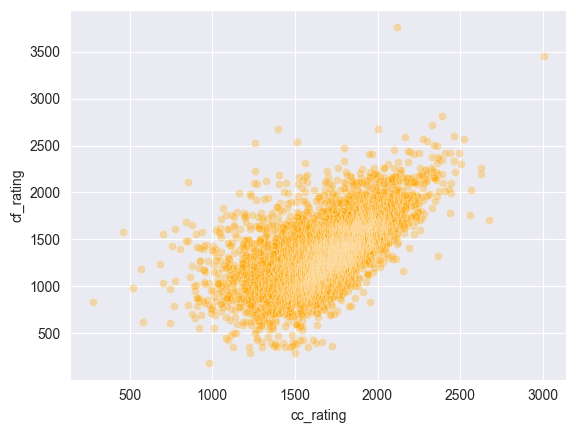

In [3]:
x = df['cc_rating']
y = df['cf_rating']
sns.set_style("darkgrid")
sns.scatterplot(x=x,y=y,alpha=0.3,color='orange')

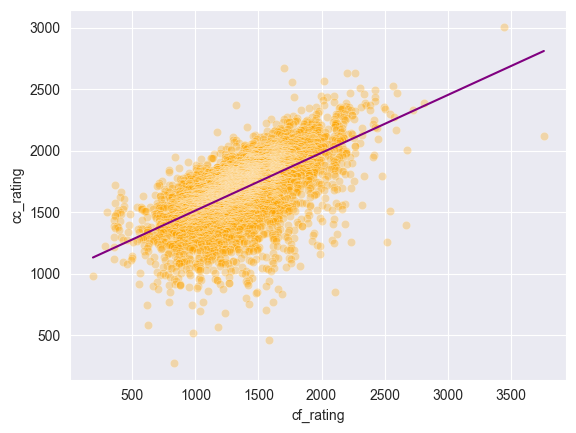

In [4]:
def predict(m, c, x):
    return m * x + c

# Normalize the data
x = df['cf_rating']
y = df['cc_rating']
x_mean, x_std = x.mean(), x.std()
y_mean, y_std = y.mean(), y.std()
x_normalized = (x - x_mean) / x_std
y_normalized = (y - y_mean) / y_std

# Initialize parameters
m, c = 0, 0
alpha = 0.01
n = df.shape[0]
losses = []

for i in range(1000):
    if i % 100 == 0:
        clear_output(wait=True)
        sns.scatterplot(x=x, y=y, color='orange',alpha=0.3)
        
        # Denormalize the slope and intercept
        m_denormalized = m * (y_std / x_std)
        c_denormalized = c * y_std + y_mean - m_denormalized * x_mean
        
        plot_x = np.linspace(x.min(), x.max(), 100)
        plot_y = predict(m_denormalized, c_denormalized, plot_x)
        sns.lineplot(x=plot_x, y=plot_y, color='purple')
        plt.show()
        time.sleep(0.1)
    
    predictions = predict(m, c, x_normalized)
    loss = predictions - y_normalized
    
    m_grad = np.dot(x_normalized, loss)/n
    c_grad = loss.sum()/n
    
    m -= alpha * m_grad
    c -= alpha * c_grad

clear_output(wait=True)
sns.scatterplot(x=x, y=y, color='orange',alpha=0.3)

m_denormalized = m * (y_std / x_std)
c_denormalized = c * y_std + y_mean - m_denormalized * x_mean

plot_x = np.linspace(x.min(), x.max(), 100)
plot_y = predict(m_denormalized, c_denormalized, plot_x)
sns.lineplot(x=plot_x, y=plot_y, color='purple')
plt.show()

In [5]:
print("The linear relation between cc and cf rating is:")
print(f"cc_rating = {m_denormalized} * cf_rating + {c_denormalized}")

The linear relation between cc and cf rating is:
cc_rating = 0.4691084866983731 * cf_rating + 1044.6641156940266


## For predicting ratings, uncomment the below code block:

In [6]:
# print("Welcome to Rating predictor!")
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# print("Press any of these keys to continue:")
# print("(1) cc -> cf\n(2) cf -> cc\n(q) Quit")
# print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# while(True):
#     key = (input("Which operation would you like to perform? (1/2/q)"))
#     if(key=='1'):
#         cc = int(input("Enter CodeChef rating: "))
#         print(f"Predicted Codeforces rating: {round(predict(1/m_denormalized,-c_denormalized/m_denormalized,cc))}")
#     elif(key=='2'):
#         cf = int(input("Enter Codeforces rating: "))
#         print(f"Predicted CodeChef rating: {round(predict(m_denormalized,c_denormalized,cf))}")
#     else:
#         break